<a href="https://colab.research.google.com/github/tamaravera14/SIMULACI-N-I/blob/main/MetododeMonteCarloOrdinario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método de Monte Carlo Ornidario**
---
*Bazaldua Vera Tamara Alheli*


La idea central del método de integración Monte Carlo es la siguiente, si deseamos calcular la integral $I = \int_{a}^{b} g(x)$ para alguna función g(x) difícil de integrar analíticamente, podemos hacer la siguiente sustitución:

$ I = \int_{a}^{b} g(x)dx = \int_{a}^{b} w(x)f(x) dx $

con  $ w(x) =  g(x)(b-a) $ y $ f(x) = 1/(b-a)$ dadas de la siguiente manera

Por tanto, la integral transformada puede interpretarse como un múltiplo del valor esperado de g(x) bajo la distribución uniforme:

$ E(g(X)) = I/ (b-a) $ con $ U - unif (a,b) $

Si tomamos una muestra de números pseudoaleatorios uniformemente dis- tribuidos, digamos X1,..., XN ~ Unif(a, b), por la ley de los grandes números para N suficientemente grande tendremos que, con probabilidad 1:

$1/N ∑_{i=1}^{N} g(Xi)  -->  E(g(X))$

In [5]:
import random

In [4]:
import numpy as np

In [38]:
def Met_Monte_Carlo_Or(N,a,b):
    valor = [random.uniform(a,b) for _ in range(N)]
    return valor
a=0
b=1


In [39]:
def g(x):
  return np.sqrt(np.arctan(x))

In [42]:
def prom(N):
 x = Met_Monte_Carlo_Or(N,0,1)
 promedio = np.mean(g(np.array(x)))
 return promedio

promedio = prom(1000)
print(promedio)

0.6377450096799566


In [58]:
from sympy import integrate, Symbol, sqrt, atan
from statistics import stdev

x = Symbol('x')

inte = integrate(sqrt(atan(x)), (x, 0, 1))


resul = inte.evalf()

# Cálculo del error
error = resul - promedio

# Impresión de resultados
print(f"Resultado de la integral: {resul:.5f}")
print(f"Error: {error:.5f}")


Resultado de la integral: 0.62982
Error: -0.00792


In [59]:
def experimento(m):
  p=[]
  for j in range(1,m):
    aguila = prom(j)
    p.append(aguila)
  return  p

In [66]:
p= experimento(1000)

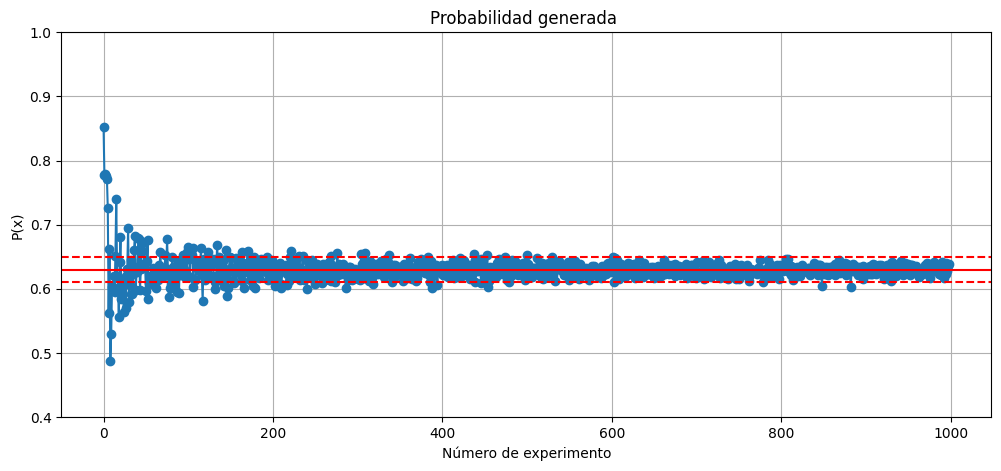

In [67]:
from matplotlib import pyplot as plt
# Gráfico
plt.figure(figsize=(12, 5))
plt.plot(p, marker='o', linestyle='-')
plt.title("Probabilidad generada ")
plt.xlabel("Número de experimento")
plt.ylabel("P(x)")
plt.ylim([0.4, 1])
plt.axhline(y = resul, color='r', linestyle='-')
plt.axhline(y = np.mean(p) + stdev(p), color='r', linestyle='--')
plt.axhline(y = np.mean(p) - stdev(p), color='r', linestyle='--')
plt.grid(True)
plt.show()